In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [7]:
from pandas_datareader import data, wb 

In [8]:
from datetime import datetime


<br> <br>  In this project I am going to analyse the tech comapanies stock market price from [Yahoo Finace](https://finance.yahoo.com/u/yahoo-finance/watchlists/tech-stocks-that-move-the-market/) real time data souce.<br> You will find I have done few analysis on Google, Tesla, Amazon, Microsoft and Apple like giant companies. Whats there market risk and future Trending Tickers, forecasting in the stock market price.<br> <br> <br>

In [9]:
tech_list = ['GOOG','MSFT','AMZN','TSLA','AAPL']

In [10]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [12]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,189.497738,185.769445,187.632262,187.645516,3.262380e+07,186.092685
std,22.251711,21.975718,22.113164,22.131338,1.416307e+07,21.880188
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.052505,169.737499,171.355000,171.032497,2.284003e+07,170.217468
50%,187.349998,184.845001,186.204994,185.955002,2.910085e+07,184.126984
75%,209.312500,205.632496,207.299999,207.645000,3.891910e+07,205.888016
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-03-14 to 2019-03-14
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


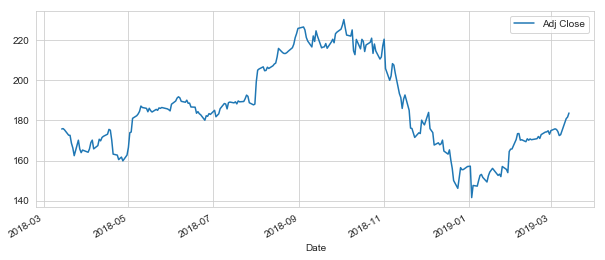

In [14]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

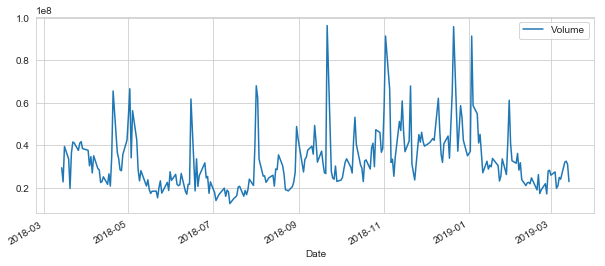

In [15]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [16]:
ma_day = [30]

In [17]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()


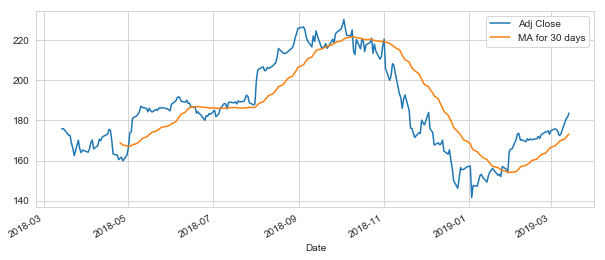

In [18]:
AAPL[['Adj Close','MA for 30 days']].plot(subplots=False,figsize=(10,4))

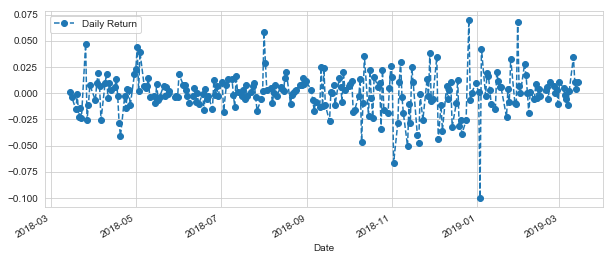

In [19]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\suran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


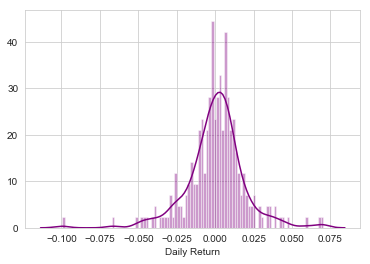

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

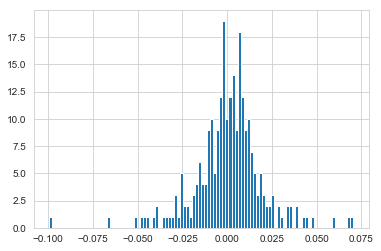

In [21]:
AAPL['Daily Return'].hist(bins=100)

In [22]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [23]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-03-14,175.763611,1591.000000,1149.489990,92.292183,326.630005
2018-03-15,175.970459,1582.319946,1149.579956,92.616714,325.600006
2018-03-16,175.349915,1571.680054,1135.729980,93.029739,321.350006
2018-03-19,172.670731,1544.930054,1099.819946,91.348114,313.559998
2018-03-20,172.611618,1586.510010,1097.709961,91.584137,310.549988


In [24]:
# finding the percentage changes for returns per company

tech_returns = closing_df.pct_change().dropna()
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-03-15,0.001177,-0.005456,0.000078,0.003516,-0.003153
2018-03-16,-0.003526,-0.006724,-0.012048,0.004460,-0.013053
2018-03-19,-0.015279,-0.017020,-0.031618,-0.018076,-0.024242
2018-03-20,-0.000342,0.026914,-0.001918,0.002584,-0.009599
2018-03-21,-0.022655,-0.002931,-0.006222,-0.006980,0.019256


C:\Users\suran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


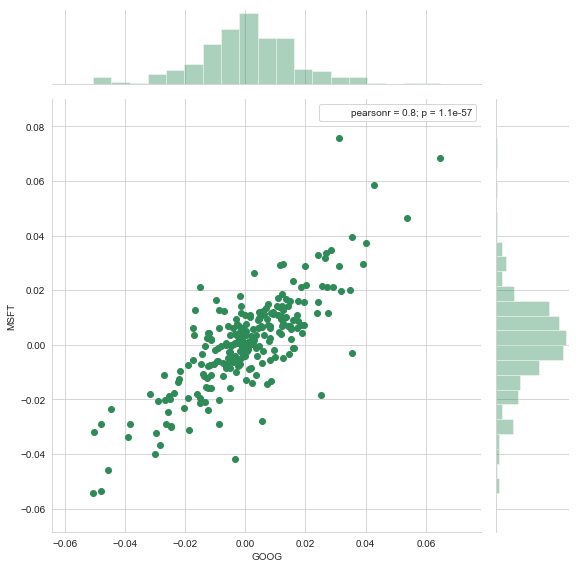

In [25]:
import scipy.stats as sci
sns.jointplot('GOOG','MSFT',tech_returns,kind="scatter",color='seagreen',height=8,stat_func=sci.pearsonr)
# sns.jointplot("GOOG", "MSFT", data=tech_returns, kind='kde')


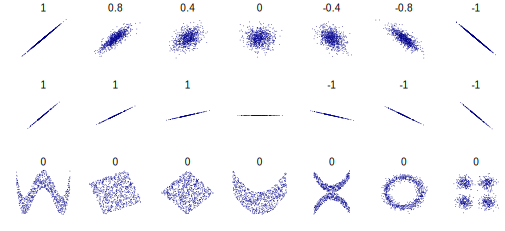

In [26]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

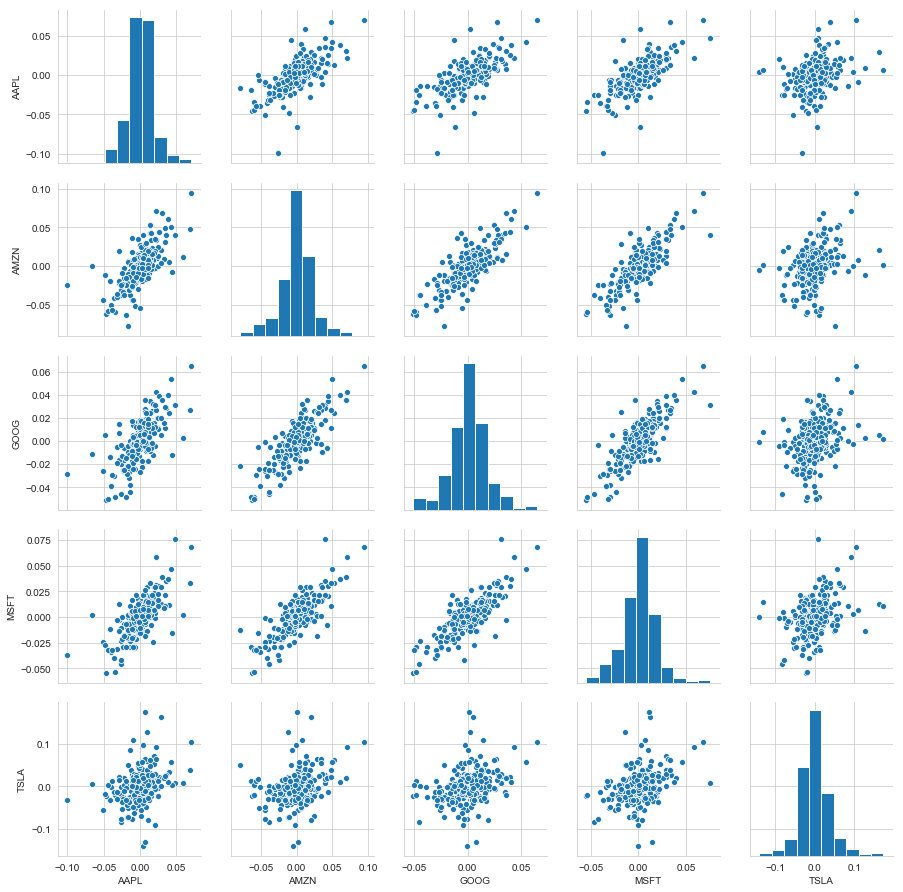

In [27]:
sns.pairplot(tech_returns.dropna(), palette="husl")

 <br><br>
 From this pair plot we can see the corelation between Microsoft and Google has the best returns <br>

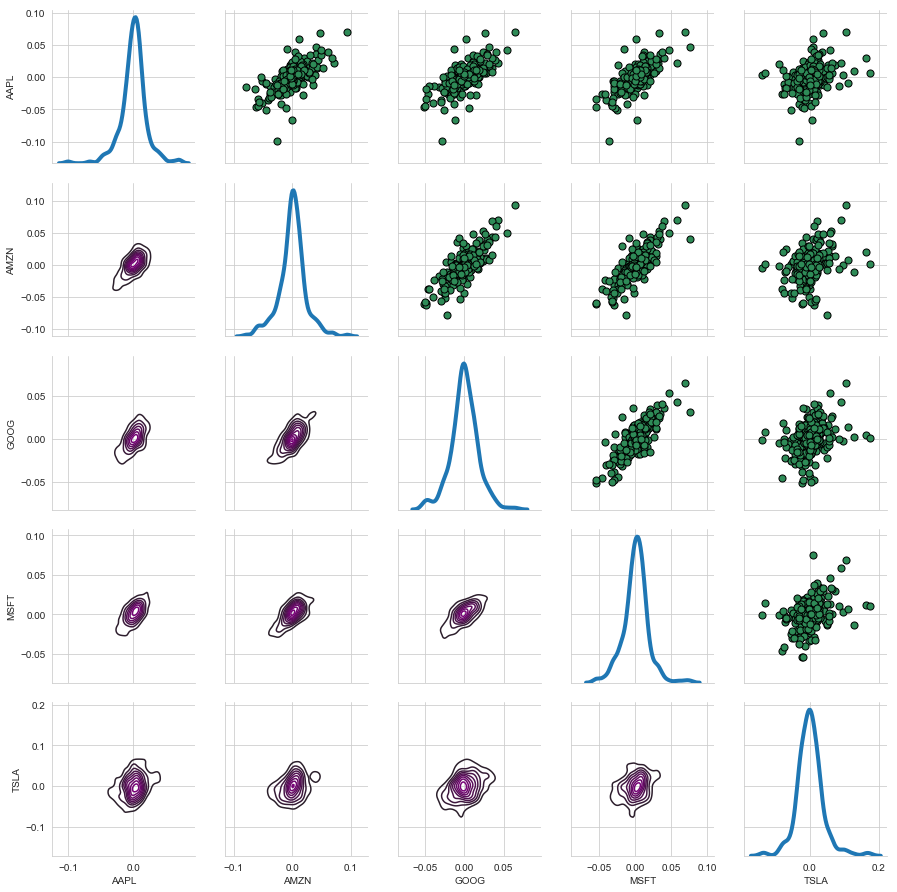

In [28]:

g = sns.PairGrid(tech_returns,diag_sharey=False, palette="GnBu_d")
g.map_upper(plt.scatter, s=50, edgecolor="black", color='seagreen', )
g.map_lower(sns.kdeplot, color = "purple")
g.map_diag(sns.kdeplot, lw=4);

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.



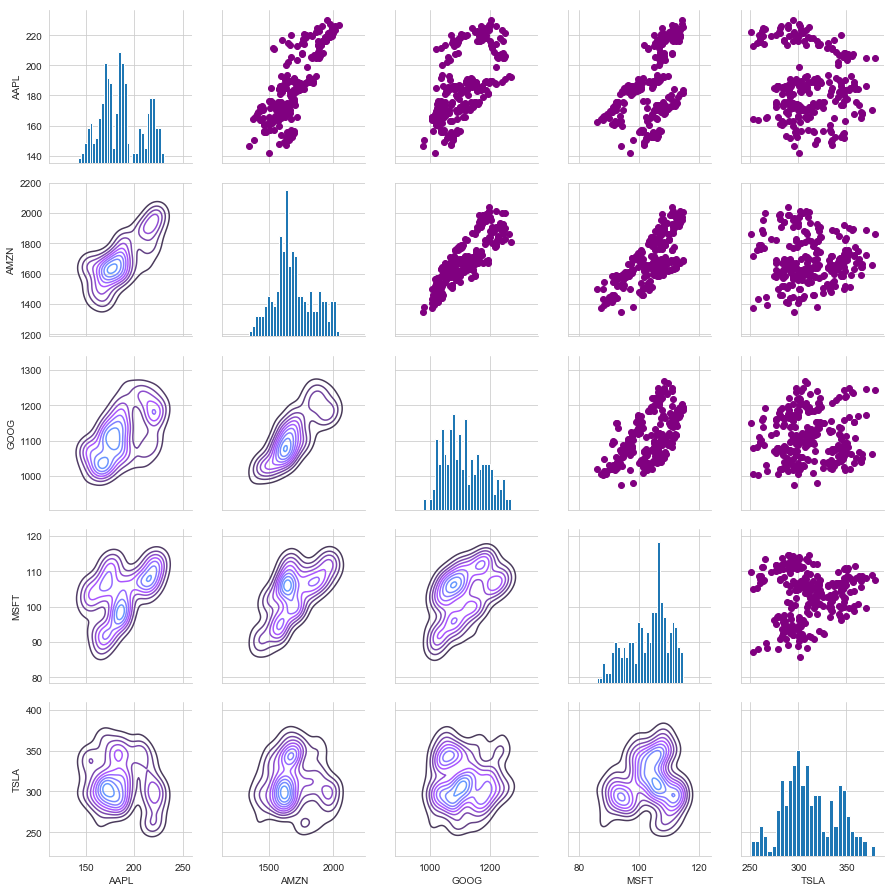

In [31]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)


Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.



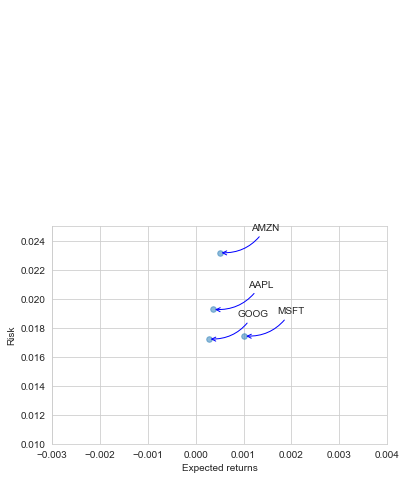

In [43]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_returns.dropna()

area = np.pi*10

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad =-0.3',color ='b'))
    ##arrowstyle="->",
                            ##connectionstyle="arc"

### Value at Risk<br>
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this [link](http://en.wikipedia.org/wiki/Quantile)

Let's go ahead and repeat the daily returns histogram for Apple stock.

C:\Users\suran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


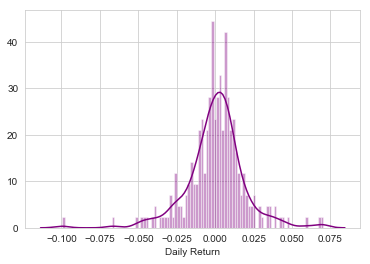

In [56]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [50]:

# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']


In [51]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

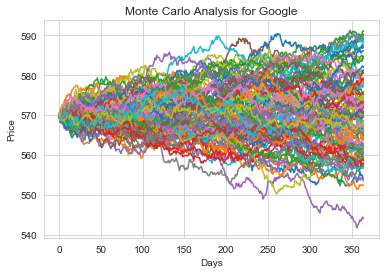

In [52]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [54]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

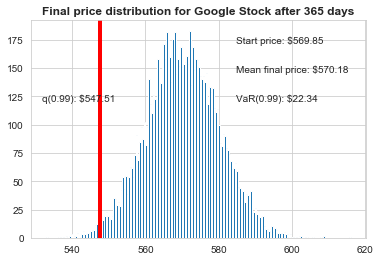

In [55]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $22.34 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $22.34 at risk 99% of the time from our Monte Carlo Simulation.